In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jaxquantum as jqt
import jaxquantum.circuits as jqtc
from jax import jit, grad
import jax.numpy as jnp
from math import prod
import matplotlib.pyplot as plt

import jax
import optax
import functools

In [8]:
N = 10
beta = 2
reg = jqtc.Register([2,N])
cirq = jqtc.Circuit.create(reg, layers=[])
cirq.append(jqtc.X(),0)
cirq.append(jqtc.CD(N, beta),[0,1])
initial_state = jqt.basis(2,0) ^ jqt.basis(N,0)
res = jqtc.simulate(cirq, initial_state, mode="kraus")

a = jqt.identity(2) ^ jqt.destroy(N)
q = (a + a.dag())/2

assert jnp.abs(beta/2 + jqt.overlap(res[-1][-1], q)) < 1e-6, "Overlap with q should be close to beta/2"

100%|██████████| 2/2 [00:00<00:00, 15.27it/s]


(<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>,
 <matplotlib.contour.QuadContourSet at 0x31e16a8e0>)

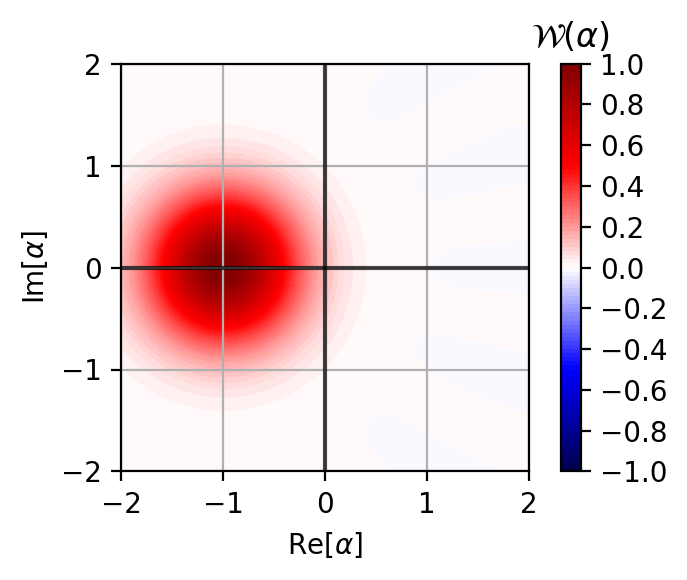

In [18]:
pts = jnp.linspace(-2, 2, 100)
jqt.plot_wigner(jqt.ptrace(res[-1][-1],1), pts)

In [ ]:
N = 10
alpha = 1
reg = jqtc.Register([2,N])
cirq = jqtc.Circuit.create(reg, layers=[])
cirq.append(jqtc.X(),0)
cirq.append(jqtc.D(N, alpha, ts=jnp.linspace(0,100,101)),1, default_simulate_mode="hamiltonian")
initial_state = jqt.basis(2,0) ^ jqt.basis(N,0)
res = jqtc.simulate(cirq, initial_state)

a = jqt.identity(2) ^ jqt.destroy(N)
q = (a + a.dag())/2

assert jnp.abs(alpha - jqt.overlap(res[-1][-1], q)) < 1e-7

100% |██████████| [00:00<00:00, 28892.36%/s]
100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
